# Exemples de base sur le module Matplotlib.

#### Copyright(C) 2024, Charles Theetten, <chalimede@proton.me>

Les codes présentés dans ce notebook sont des exemples de base qui servent avant tout à se familiariser avec le module Matplotlib pour la science des données.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option("display.max_columns", 20)

In [3]:
df = pd.read_csv("csv/atp_tennis.csv")

df.head()

,Tournament,Date,Series,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Score
0,Australian Open,2003-01-13,Grand Slam,Outdoor,Hard,1st Round,5,Agassi A.,Vahaly B.,Agassi A.,2,93,-1,-1,7-5 6-3 6-3
1,Australian Open,2003-01-13,Grand Slam,Outdoor,Hard,1st Round,5,Waske A.,Ancic M.,Ancic M.,120,88,-1,-1,3-6 4-6 6-7
2,Australian Open,2003-01-13,Grand Slam,Outdoor,Hard,1st Round,5,Arthurs W.,Daniel M.,Arthurs W.,52,241,-1,-1,6-7 3-6 7-6 6-4 6-4
3,Australian Open,2003-01-13,Grand Slam,Outdoor,Hard,1st Round,5,Voltchkov V.,Canas G.,Canas G.,71,18,-1,-1,3-6 5-7 3-6
4,Australian Open,2003-01-13,Grand Slam,Outdoor,Hard,1st Round,5,Coria G.,Clavet F.,Coria G.,45,118,-1,-1,6-4 7-5 6-1


In [4]:
print(f"Dimensions du dataset: {df.shape}.")

Dimensions du dataset: (43020, 15).


In [5]:
print("Structure du dataset :\n")

df.info()

Structure du dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43020 entries, 0 to 43019
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tournament  43020 non-null  object
 1   Date        43020 non-null  object
 2   Series      43020 non-null  object
 3   Court       43020 non-null  object
 4   Surface     43020 non-null  object
 5   Round       43020 non-null  object
 6   Best of     43020 non-null  int64 
 7   Player_1    43020 non-null  object
 8   Player_2    43020 non-null  object
 9   Winner      43020 non-null  object
 10  Rank_1      43020 non-null  int64 
 11  Rank_2      43020 non-null  int64 
 12  Pts_1       43020 non-null  int64 
 13  Pts_2       43020 non-null  int64 
 14  Score       43020 non-null  object
dtypes: int64(5), object(10)
memory usage: 4.9+ MB


In [6]:
print(f"Types de tournois : {df.Series.unique()}.")

Types de tournois : ['Grand Slam' 'Masters' 'Masters Cup' 'ATP250' 'ATP500'].


In [7]:
intersect = set(df[df.Series == "ATP250"].Tournament) & set(df[df.Series == "ATP500"].Tournament)
df        = df[~df["Tournament"].isin(intersect)]

print(f"Nombre de différents tournois    : {len(df.Tournament.unique())}.")
print("Nombre de tournois par catégorie :\n")

df.groupby("Series").Tournament.unique().transform(lambda n: len(n))

Nombre de différents tournois    : 175.
Nombre de tournois par catégorie :



Series
ATP250         125
ATP500          23
Grand Slam       4
Masters         22
Masters Cup      1
Name: Tournament, dtype: int64

In [8]:
print(f"Nombre de joueurs : {len(pd.unique(df[["Player_1", "Player_2"]].values.ravel()))}.")

Nombre de joueurs : 1282.


In [9]:
print(f"Dix joueurs ayant gagné le plus de matchs sur Gazon :\n{df[(df.Surface == "Grass")].Winner.value_counts()[0:10]}.")

Dix joueurs ayant gagné le plus de matchs sur Gazon :
Winner
Federer         111
Djokovic N.      95
Murray A.        69
Nadal R.         61
Mannarino A.     58
Lopez F.         55
Querrey S.       54
Isner J.         47
Gasquet R.       46
Cilic M.         44
Name: count, dtype: int64.


In [10]:
grand_slam = df[df.Series == "Grand Slam"].Tournament.unique()

for tournament in grand_slam:
    print(f"Joueur ayant gagné le plus de fois le tournoi {tournament:20} : {df[(df.Tournament == tournament) & (df.Round == "Final")].Winner.value_counts().idxmax()}")

Joueur ayant gagné le plus de fois le tournoi Australian Open      : Djokovic N.
Joueur ayant gagné le plus de fois le tournoi French Open          : Nadal R.
Joueur ayant gagné le plus de fois le tournoi Wimbledon            : Federer
Joueur ayant gagné le plus de fois le tournoi US Open              : Federer


In [11]:
print(f"Joueur ayant gagné le plus de demi-finales sur tous les tournois : {df[df.Round == "Semifinals"].Winner.value_counts().index[0]}")

Joueur ayant gagné le plus de demi-finales sur tous les tournois : Djokovic N.


In [12]:
def number_of_sets(scores, lim):
    i = 0

    for s in scores:
        if s.count("-") != lim:
            scores = scores.drop(scores.index[i])
        else:
            i += 1

    return i


for i in [3, 4, 5]:
    new_df = df[(df.Series == "Grand Slam")].groupby("Winner").agg({ "Score" : lambda scores, lim = i: number_of_sets(scores, lim) })
    print(f"Joueur ayant gagné le plus de matchs en {i} sets en grands chelems : {new_df.Score.idxmax()} avec {new_df.Score.max()} victoires.")

Joueur ayant gagné le plus de matchs en 3 sets en grands chelems : Federer avec 250 victoires.
Joueur ayant gagné le plus de matchs en 4 sets en grands chelems : Djokovic N. avec 87 victoires.
Joueur ayant gagné le plus de matchs en 5 sets en grands chelems : Djokovic N. avec 34 victoires.


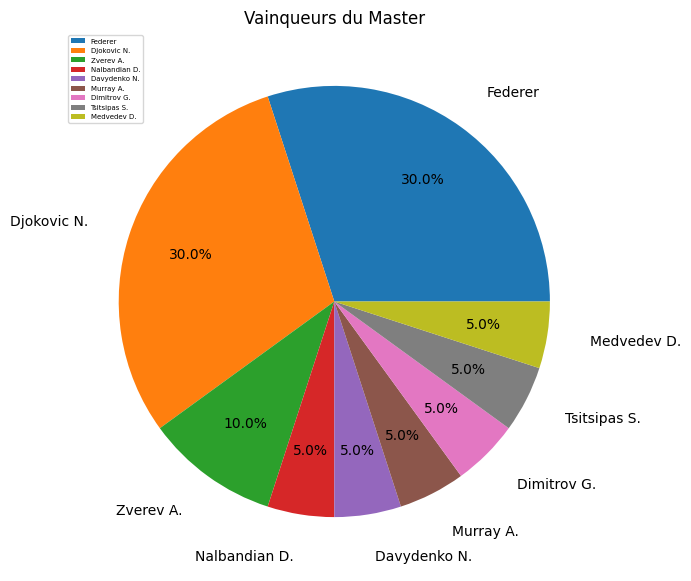

In [13]:
results = df[(df.Series == "Masters Cup") & (df.Round == "Final")].Winner.value_counts()

players = results.index
wins    = results.values

fig, ax = plt.subplots(1, 1, figsize = (7, 7))

ax.set_title("Vainqueurs du Master")
ax.pie(wins, labels        = players,
             autopct       = lambda x: str(round(x, 2)) + "%",
             pctdistance   = 0.7,
             labeldistance = 1.2)
ax.legend(fontsize = 5, loc = "upper left");


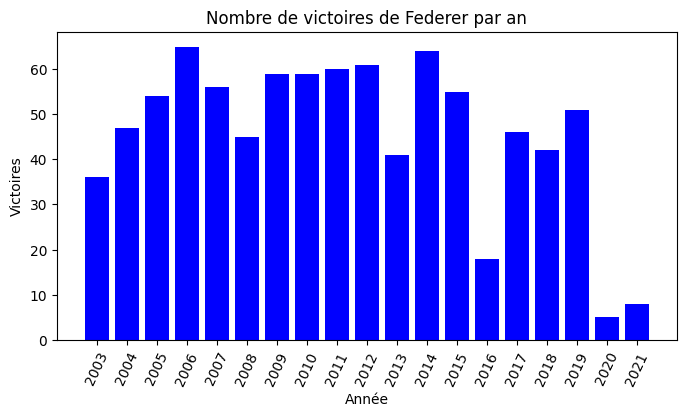

In [14]:
df["Year"] = pd.to_datetime(df.Date, yearfirst = True).dt.year
wins       = df[df.Winner.str.contains("Federer")].groupby("Year").agg({"Year" : lambda x: len(x)})

fig = plt.figure(figsize = (8, 4))
ax  = fig.add_subplot(111)

ax.set_title("Nombre de victoires de Federer par an")
ax.set_xlabel("Année")
ax.set_ylabel("Victoires")
ax.set_xticks(wins.index)
ax.set_xticklabels(wins.index, rotation = 65)

ax.bar(wins.index, wins.values.flatten(), color = "b");

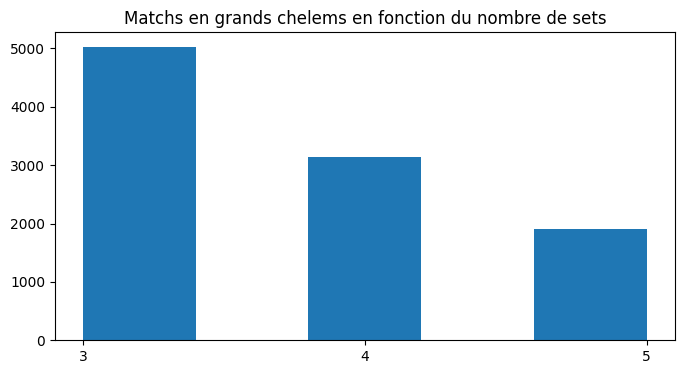

In [15]:
wins = df[(df.Series == "Grand Slam")].Score.apply(lambda score: str(score).count("-"))
wins = wins.loc[lambda x: x > 2]

fig = plt.figure(figsize = (8, 4))
ax  = fig.add_subplot(111)

ax.set_title("Matchs en grands chelems en fonction du nombre de sets")
ax.set_xticks(range(2, 7, 1))
ax.hist(wins, bins = 5);

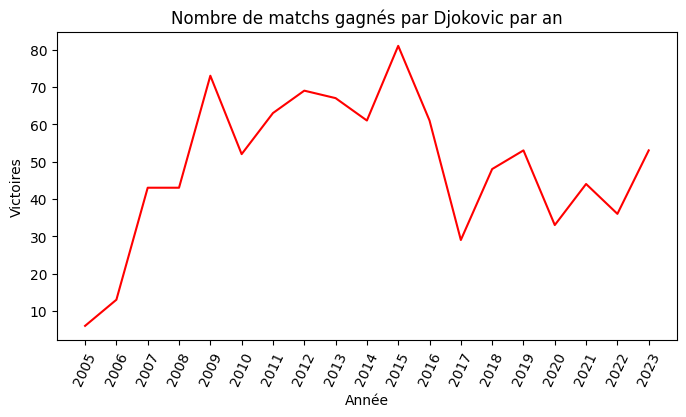

In [16]:
wins = df[(df.Winner.str.contains("Djokovic")) & (df.Year >= 2003) & (df.Year <= 2023)].groupby("Year").agg({"Year" : lambda x: len(x)})

fig = plt.figure(figsize = (8, 4))
ax  = fig.add_subplot(111)

ax.set_title("Nombre de matchs gagnés par Djokovic par an")
ax.set_xlabel("Année")
ax.set_ylabel("Victoires")
ax.set_xticks(wins.index)
ax.set_xticklabels(wins.index, rotation = 65)

ax.plot(wins.index, wins.values, color = "r");